# 5.3.7 Hypergeometric distribution and Hahn-chaos

$$ f(k; \alpha, \beta, N) = \frac{\binom{\alpha}{k} \binom{\beta}{N-k}}{\binom{\alpha+\beta}{N}}=hypergeom.pmf(k, \beta+\alpha, \alpha, N, loc=0)$$

[Hypergeometric Distribution Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html)

[Wiki - Hypergeometric Distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

$$ \zeta \sim hypergeom.pmf(k, \beta+\alpha, \alpha, N, loc=0)$$

[Wiki - Hahn Polynomial](https://en.wikipedia.org/wiki/Hahn_polynomials)

$$
\begin{align*}
Q_0(x; \alpha, \beta, N) &= 1\\
Q_1(x; \alpha, \beta, N) &= 1-\frac{(\alpha+\beta+2)x}{(\alpha+1)N}\\
Q_2(x; \alpha, \beta, N) &= 1-\frac{(\alpha+\beta+3)2x}{(\alpha+1)N}+\frac{(\alpha+\beta+3)(\alpha+\beta+4)(x^2-x)}{(\alpha+1)(\alpha+2)(N^2-N)}\\
Q_3(x; \alpha, \beta, N) &= 1-\frac{(\alpha+\beta+4)3x}{(\alpha+1)N}+\frac{3(\alpha+\beta+4)(\alpha+\beta+5)(x^2-x)}{(\alpha+1)(\alpha+2)(N^2-N)}-\frac{(\alpha+\beta+4)(\alpha+\beta+5)(\alpha+\beta+6)(-x^3+3x^2-2x)}{(\alpha+1)(\alpha+2)(\alpha+3)(-N^3+3N^2-2N)}\\
Q_4(x; \alpha, \beta, N) &= 1-\frac{(\alpha+\beta+5)4x}{(\alpha+1)N}+\frac{6(\alpha+\beta+5)(\alpha+\beta+6)(x^2-x)}{(\alpha+1)(\alpha+2)(N^2-N)}-\frac{4(\alpha+\beta+5)(\alpha+\beta+6)(\alpha+\beta+7)(-x^3+3x^2-2x)}{(\alpha+1)(\alpha+2)(\alpha+3)(-N^3+3N^2-2N)}\\
& \  +\frac{(\alpha+\beta+5)(\alpha+\beta+6)(\alpha+\beta+7)(\alpha+\beta+8)(x^4-6x^3+11x^2-6x)}{(\alpha+1)(\alpha+2)(\alpha+3)(\alpha+4)(N^4-6N^3+11N^2-6N)}\\
\cdots
\end{align*}
$$
$$ Q_n(x; \alpha, \beta, N) =\ _3F_2(-n,n+\alpha+\beta+1,-x;\alpha+1, -N;1)$$

Corresponding Hypergeometric orthogonal polynomial
$$ f(k; \alpha, \beta, N) = \frac{\binom{\alpha}{k} \binom{\beta-\alpha}{N-k}}{\binom{\beta}{N}}=hypergeom.pmf(k, \beta, \alpha, N, loc=0)$$

In [10]:
import numpy as np
from math import factorial
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.stats import hypergeom

%matplotlib notebook

In [18]:
def Hahn(params):

    n = params[0]  #degree
    a = params[1]
    b = params[2]  #parameter value
    N = params[3]  #parameter value
    if n==0:
        return lambda u: 1
    elif n==1:
        return lambda u: 1 - (a+b+2)*u/((a+1)*N)
    elif n==2:
        return lambda u: 1 - 2*(a+b+3)*u/((a+1)*N) + (a+b+3)*(a+b+4)*(u**2-u)/((a+1)*(a+2)*(N**2-N))
    elif n==3:
        return lambda u: 1 - 3*(a+b+4)*u/((a+1)*N) + 3*(a+b+4)*(a+b+5)*(u**2-u)/((a+1)*(a+2)*(N**2-N)) + (-1)*(a+b+4)*(a+b+5)*(a+b+6)*(-u**3+3*u**2-2*u)/((a+1)*(a+2)*(a+3)*(-N**3+3*N**2-2*N))
    else: #this actually means n=4
        return lambda u: 1 - 4*(a+b+5)*u/((a+1)*N) + 6*(a+b+5)*(a+b+6)*(u**2-u)/((a+1)*(a+2)*(N**2-N)) - 4*(a+b+5)*(a+b+6)*(a+b+7)*(-u**3+3*u**2-2*u)/((a+1)*(a+2)*(a+3)*(-N**3+3*N**2-2*N)) + (a+b+5)*(a+b+6)*(a+b+7)*(a+b+8)*(u**4-6*u**3+11*u**2-6*u)/((a+1)*(a+2)*(a+3)*(a+4)*(N**4-6*N**3+11*N**2-6*N))

In [19]:
############# Hahn Chaos ###############
def product2_hahn(i,j,params):
    a = params[0]
    b = params[1]
    N = params[2]
    #compute \Phi_i*\Phi_j
    return lambda x: Hahn((i,a,b,N))(x)*Hahn((j,a,b,N))(x)

def inner2_hahn(i,j,params):     #Big error
    #compute <\Phi_i\Phi_j>
    inner = 0 
    a = params[0] #alpha
    b = params[1]
    N = params[2]
    for k in range(N+1):
        inner += factorial(a)*factorial(b)*factorial(N)*factorial(a+b-N)*product2_hahn(i,j,params)(k)/(factorial(k)*factorial(a-k)*factorial(N-k)*factorial(b-N+k)*factorial(a+b))
    
    return inner

############# Hahn Chaos ###############
def product3_hahn(i,j,l,params):
    #compute \Phi_i*\Phi_j*\Phi_l
    a = params[0] #alpha
    b = params[1]
    N = params[2]
    return lambda x: Hahn((i,a,b,N))(x)*Hahn((j,a,b,N))(x)*Hahn((l,a,b,N))(x)

def inner3_hahn(i,j,l,params):
    #compute <\Phi_i\Phi_j\Phi_l>
    inner = 0 
    a = params[0] #alpha
    b = params[1]
    N = params[2]
    for k in range(N+1):
        inner += factorial(a)*factorial(b)*factorial(N)*factorial(a+b-N)*product3_hahn(i,j,l,params)(k)/(factorial(k)*factorial(a-k)*factorial(N-k)*factorial(b-N+k)*factorial(a+b))
    
    return inner

<font color = red>**Big Error**

In [102]:
params=[5,5,4]
print(inner2_hahn(0,2,params))

-0.20370370370370366


### <font color = red> I want to search alpha, beta, $N$ values which can make $\langle\Phi_0, \Phi_2\rangle$=0
### <font color = red>According to the definition of Hahn-chaos and how he defined the weight function and inner product, I couldn't get the result I should get

### <font color = red> I cannot find one

In [103]:
for i in range(2,20):
    for j in range(2,20):
        for l in range(2,np.min((i,j))):
            params = [i,j,l]
            if np.abs(inner2_hahn(0,2,params))< 10**(-5):
                print(i)
                print(j)
                print(l)
                print('\n')
            

`expect(func, args=(M, n, N), loc=0, lb=None, ub=None, conditional=False)`


In [53]:
# \alpha=\beta=5, N=4
# M=\alpha + \beta, n=\alpha

def f(params):
    n = params
    return lambda u: u**n

for i in range(5):
    print(hypergeom.expect(f(i), args=(10,5,4),loc=0,lb=None, ub=None, conditional=False))


1.0
2.0
4.666666666666666
11.999999999999998
33.23809523809524


### <font color = red> When $\alpha=5, \beta=5, N=4$, 
$$ Q_0(x) = 1, \ \ \ Q_1(x) = 1-\frac{5}{2}x, \ \ \ Q_2(x) = \frac{13}{36}x^2 -\frac{52}{36}x+1$$
<font color = red> Then 
$$
\langle Q_0Q_2\rangle = \frac{13}{36} EX^2 - \frac{52}{36}EX +1 = \frac{13}{36} \frac{14}{3} - \frac{52}{36}2 +1\neq 0
$$
    
The way the author defined things contradicts with itself, I cannot figure it out how he got the plots. I don't know which definition he really used

In [7]:
def ode_system_hahn(y, t, P, params):   
    #P indicates the highest degree
    a = params[0] #alpha
    b = params[1]
    N = params[2]
    
    dydt = np.zeros(P+1) 
    for l in range(len(dydt)):
        dydt[l] = -(sum(sum(inner3_hahn(i,j,l,params)*ki_hahn[i]*y[j] for j in range(P+1)) for i in range(P+1)))/inner2_hahn(l,l,params)
    return dydt

In [8]:
P = 4
params = [5,5,4]
ki_hahn = [2,-2]+[0]*(P-1)
sol_hahn = odeint(ode_system_hahn, [1.0]+[0.0]*P, np.linspace(0,1,101), args=(P, params)) 

In [9]:
def y_determ_hahn(x):
    return np.e**(-2*x)

<IPython.core.display.Javascript object>


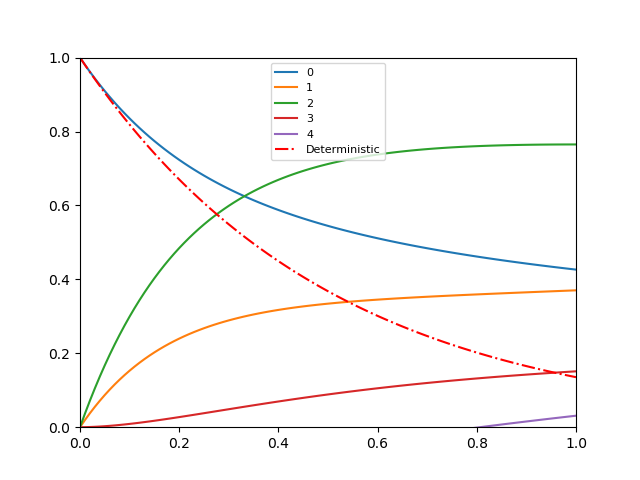

In [11]:
plt.figure()
plt.ylim([0,1])
plt.xlim([0,1])

x= np.linspace(0,1,101)

for i in range(P+1):
    plt.plot(x,sol_hahn[:,i],label=i)

plt.plot(x, y_determ_hahn(x), color='r', linestyle='-.',label='Deterministic')
plt.legend(prop={'size': 8})

expect(func, args=(M, n, N), loc=0, lb=None, ub=None, conditional=False)	

<font color = red>This is $\alpha=\beta=8, N=5$
$\downarrow$

In [ ]:
allcoeff_537_1 = np.zeros((5,4))   #store ki value/ column 0 stores ki when P=1; column 1 stores ki when P=2
allcoeff_537_1[0,:]=45/16*np.ones(4)
allcoeff_537_1[1,:]=-45/16*np.ones(4)
y_537_1 = np.zeros((5,4))   #row 0 stores y0 for each P from 1-4; row 1 stores y1 for P from 1-4;...

params = [8,8,5]
for i in range(4):
    P=i+1
    ki_kr = allcoeff_537_1[:,i]
    y_mid=odeint(ode_system_kr, [1.0]+[0.0]*P, np.linspace(0,1,2), args=(P, params))[1,:]
    y_537_1[:,i] = y_mid.tolist()+[0]*(4-P)

In [39]:
a = 8
b = 8
N = 5

mean_exact_537_1  = 0
for k in range(N+1):
    mean_exact_537_1  += np.e**(-k)*hypergeom.pmf(k,a+b,a,N,loc=0)
print(mean_exact_537_1 )

0.1288732640067462


<font color = red>**following wrong**

In [46]:
for i in range(9):
    #to compute $\bar{y}(t)$
    print(hypergeom.expect(Hahn((i,a,b,N)), args=(a+b,a,N), loc=0, lb=None, ub=None, conditional=False))

1.0000000000000004
0.11111111111111135
-0.044444444444444314
-0.03939393939393937
-0.019393939393939286
-0.019393939393939286
-0.019393939393939286
-0.019393939393939286
-0.019393939393939286


In [47]:
def g(params):
    n = params
    return lambda u: (Hahn((n,8,8,5))(u))**2

for i in range(1,5):
    print(hypergeom.expect(g(i), args=(16,8,5), loc=0, lb=None, ub=None, conditional=False))

0.12823045267489722
0.04501424501424502
0.025491747309929154
0.02117525422575927


In [ ]:
mean_537_1 = y_537_1[0,:]
#mean_exact_537_1 
error_mean_537_1=np.abs((mean_537_1 - mean_exact_537_1)/mean_exact_537_1)


sigma2_537_1=np.zeros(4)
for i in range(4):
    sigma2_537_1[i]=0.2*y_537_1[1,i]**2+0.1*y_537_1[2,i]**2+0.1*y_537_1[3,i]**2+0.2*y_537_1[4,i]**2
    
sigma2_exact_537_1 = (1-0.5+0.5*np.e**(-2))**5 - (1-0.5+0.5*np.e**(-1))**10
error_var_537_1=np.abs((sigma2_537_1-sigma2_exact_537_1)/sigma2_exact_537_1)


<font color = red>This is $\alpha=16, \beta=12, N=10$
$\downarrow$

In [ ]:
plt.figure()
plt.xlim([0,5])
plt.semilogy([1,2,3,4],error_mean_537_1,label='mean$\alpha=8,\beta=8,N=5$')
plt.semilogy([1,2,3,4],error_var_537_1,label='variance$\alpha=8,\beta=8,N=5$')     
plt.legend()